# Conditioning

Be sure to import Symbulate using the following commands.

In [1]:
from symbulate import *
%matplotlib inline

<a id='cond_dens_def'></a>

### Conditional distributions

We are often interested in the *conditional distribution* of some random variables *given* the values of other random variables.  For example, if $X$ represents height (inches) and $Y$ represents weight (pounds) for some population, then the conditional distribution of $X$ given $Y=150$ would represent the distribution of heights only for those in the population who weigh 150 pounds.

In principle, the conditional distribution of $X$ given $Y=y^*$ (where $y^*$ is a particular value, like 150 in the above example) can be simulated by (1) generating many $(x,y)$ pairs according to the joint distribution of $X$ and $Y$, (2) discarding all pairs for which $y\neq y^*$, and (3) summarizing the distribution of $x$ values for the pairs that remain.

<a id='pipe'></a>

### Conditioning with |

In Symbulate, the process of conditioning can be accomplished directly using the vertical "pipe" symbol | (read "given")

`(X | (Y == 150)).sim(10000)`

We illustrate conditioning first with a simple detailed example.

*Example.* A penny and a nickle are each flipped twice.  Let $X$ be the number of flips of the penny which land on heads, and $Y$ the number of flips the nickle lands on heads.  What is the probability that the penny lands on heads exactly once, given that 3 heads are flipped in total?

First, $X$ and $Y$ will be independent, each with a Binomial(2, 0.5) distribution.

In [2]:
X, Y = RV(Binomial(2, 0.5) ** 2)

The following simulates many $X, Y$ pairs.  Note that unconditionally there are 9 possible values.

In [3]:
(X & Y).sim(10000).tabulate()

"(0, 0)",639
"(0, 1)",1198
"(0, 2)",603
"(1, 0)",1246
"(1, 1)",2408
"(1, 2)",1321
"(2, 0)",584
"(2, 1)",1353
"(2, 2)",648
Total,10000


However, we only want to consider pairs for which $X+Y$ is 3.  We accomplish this through conditioning as in the following code.  Note

* There are only two possible outcomes for which $X+Y=3$, (2 heads for penny, 1 for nickle; 1 head for penny, 2 for nickle), and so conditioning on $X+Y=3$ should return only these outcomes.
* Simulating with `.sim()` when conditioning generates the specified number of values for which the conditioning event is true (i.e. 10000 $(X, Y)$ pairs for which the $X+Y = 3$.)
* The conditioning [event](rv.html#RVevent), `(X + Y == 3)`, is placed in parentheses
* The double equal sign `==` is used to check for equality

In [4]:
((X & Y) | (X + Y == 3)).sim(10000).tabulate()

"(1, 2)",4955
"(2, 1)",5045
Total,10000


The previous code illustrates the basic functionality of conditioning.  RVs and simulations with conditioning can be manipulated using the simulation tools just as those without conditioning.  For example, to find and plot the conditional distribution of $X$ given $X+Y=3$:

In [5]:
x_given_y3 = (X | (X + Y == 3)).sim(10000)
x_given_y3.tabulate(normalize=True)

1,0.5024
2,0.4976
Total,1.0


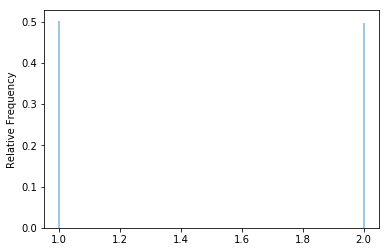

In [6]:
x_given_y3.plot()